In [ ]:
#Simple Linear Regression on Housing Prices
#@@ Downloaded House Prices from kaggle.
import pandas as pd


In [ ]:
df = pd.read_csv("/content/Housing.csv")


In [ ]:
df.shape

(545, 13)

In [ ]:
 df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [ ]:
df.tail(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(545, 13)

In [ ]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
no import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')

<Axes: ylabel='area'>

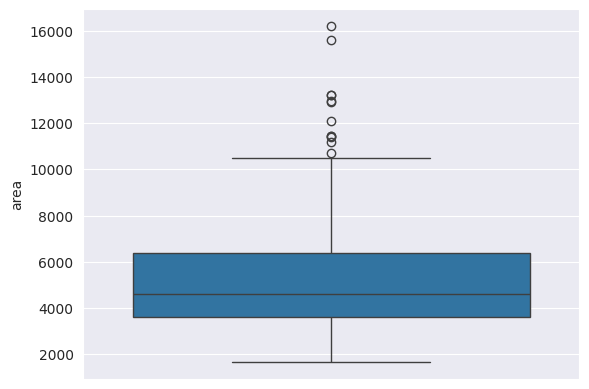

In [ ]:
sns.boxplot(df,y= 'area')

In [ ]:
import numpy as np


In [ ]:
Q1= np.percentile(df['area'], 25, interpolation='midpoint')
Q3= np.percentile(df['area'], 75, interpolation='midpoint')

In [ ]:
IQR= Q3-Q1 #excluding outliers

In [ ]:
lowerbound= Q1-1.5*IQR
Upperbound= Q3 + 1.5*IQR

In [ ]:
df = df[(df.area< Upperbound) & (df.area> lowerbound)]

In [ ]:
df.shape #recalculating number rows and columns

(530, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             530 non-null    int64 
 1   area              530 non-null    int64 
 2   bedrooms          530 non-null    int64 
 3   bathrooms         530 non-null    int64 
 4   stories           530 non-null    int64 
 5   mainroad          530 non-null    object
 6   guestroom         530 non-null    object
 7   basement          530 non-null    object
 8   hotwaterheating   530 non-null    object
 9   airconditioning   530 non-null    object
 10  parking           530 non-null    int64 
 11  prefarea          530 non-null    object
 12  furnishingstatus  530 non-null    object
dtypes: int64(6), object(7)
memory usage: 58.0+ KB


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
cat_col = df.select_dtypes('object').columns.tolist()

In [ ]:
cat_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output= False, handle_unknown='ignore') ##For unknown values

In [ ]:
encoder.fit(df[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_cols= encoder.get_feature_names_out(cat_col)

In [ ]:
encoded_cols

array(['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype=object)

In [ ]:
df[encoded_cols] = encoder.transform(df[cat_col])

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,no,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,yes,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,no,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df.drop(columns = cat_col, inplace=True)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
X = df.drop(columns = 'price')
Y=df['price']

In [ ]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7500,4,2,2,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler #Formaking columns to be on the same scale

scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [ ]:
X[:] = scaler.transform(X) # make data between 0 and 1(data normalization process)
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.662457,0.6,0.333333,0.666667,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.839265,0.6,1.000000,1.000000,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.954076,0.4,0.333333,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.671642,0.6,0.333333,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.662457,0.6,0.000000,0.333333,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.154994,0.2,0.000000,0.000000,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,0.086108,0.4,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.226177,0.2,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,0.144661,0.4,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,4.720139e+06,4949.483019,2.960377,1.284906,1.811321,0.683019,0.145283,0.854717,0.818868,0.181132,...,0.349057,0.954717,0.045283,0.683019,0.316981,0.771698,0.228302,0.250943,0.416981,0.332075
std,1.853887e+06,1813.228025,0.735500,0.499488,0.872963,0.861646,0.352719,0.352719,0.385491,0.385491,...,0.477122,0.208121,0.208121,0.465740,0.465740,0.420135,0.420135,0.433966,0.493526,0.471403
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3525.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.273500e+06,4500.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.639375e+06,6232.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.750000,1.000000,1.000000
max,1.330000e+07,10360.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Split data in to training and testing set
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2,random_state=42) # 20% for testing and 80% for training

In [ ]:
X_train.shape ,X_test.shape , Y_train.shape , Y_test.shape #calculating the size of data for training testing

((424, 20), (106, 20), (424,), (106,))

In [ ]:
#building a linear regression model with train data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred= model.predict(X_test)


In [ ]:
Y_test[:5]

,price
151,5565000
413,3430000
6,10150000
348,3815000
336,3920000


In [ ]:
Y_pred[:5]

array([5642778.92344017, 4675920.75138511, 9664556.40316985,
       3826751.15112135, 5599973.29595732])

In [ ]:
#Checking the difference between the actual and the predicted values

from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(Y_test,Y_pred)

903371.6678819933

In [ ]:
#educing the mean-square error, build model using Lasso regression
from sklearn.linear_model import Lasso
Lasso_model = Lasso(alpha= 50, max_iter=100,tol =0.1)

Lasso_model.fit(X_train,Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
Lasso_pred= Lasso_model.predict(X_test)

In [ ]:
mean_absolute_error(Y_test, Lasso_pred)

903446.0025775983

In [ ]:
Lasso_pred[:5]

array([5642209.87724588, 4674812.77093279, 9663596.60606962,
       3826586.80348036, 5600553.32620446])

In [ ]:
#Lets try build Ridge regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha= 50, max_iter = 100, tol= 0.1)

ridge_model.fit(X_train, Y_train)


Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_pred= ridge_model.predict(X_test)

In [ ]:
mean_absolute_error(Y_test, ridge_pred)

1071783.632545985

#Lasso regression models has decreased the mean square error,it  performs better than the pure linear regression model and Ridge model.